In [7]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles


In [2]:
peak_path = 'data/hATAC_mATAC_peak.bed.gz'

[common intervals] (#common)

# Interval analysis
The following notebook analyse the gnomical intervals which were obtained with ATAC expiremint. one on human cells (hATAC) and other on mouse (mATAC). <br>


Table of content :
- common intervals-<br> Check how many unique and common interval the ATAC seq of each experiment outputed
- length analysis- <br> Analyse how many common and unique basepair each expriment have

## pre-procesing the data

In [4]:
peak_df = pd.read_csv(peak_path, sep='\t',header=None, names=['CHROM','FROM','TO','ID'])
peak_df['length'] = peak_df.TO - peak_df.FROM
peak_df.head()
peak_df['label'] = 'hATAC'
peak_df.loc[peak_df.ID.str.contains('CM'),'label'] = 'mATAC'
peak_df.loc[peak_df.ID.str.contains('mATAC') & peak_df.ID.str.contains('hATAC'),'label'] = 'both'
peak_df[peak_df.label == 'both']

,CHROM,FROM,TO,ID,length,label
16,chr1,958473,959544,mATAC_hATAC_0,1071,both
17,chr1,959935,961478,mATAC_hATAC_1,1543,both
18,chr1,966167,967355,mATAC_hATAC_2,1188,both
27,chr1,1019132,1021475,mATAC_hATAC_4,2343,both
28,chr1,1024575,1025576,mATAC_hATAC_6,1001,both
...,...,...,...,...,...,...
193643,chrX,155026448,155027585,mATAC_hATAC_39908,1137,both
193645,chrX,155070025,155072116,mATAC_hATAC_39909,2091,both
193647,chrX,155215721,155217297,mATAC_hATAC_39910,1576,both
193649,chrX,155263741,155264697,mATAC_hATAC_39912,956,both


## common intervals <a class='anchor' id='common'></a>
The shared amount of intervals between hATAC to mATAC

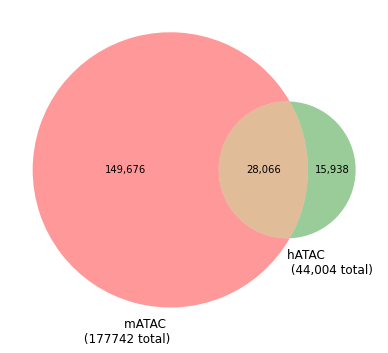

In [12]:
label_count = peak_df.label.value_counts()
plt.figure(figsize=(10,6))
v = venn2(subsets=(label_count.mATAC, label_count.hATAC, label_count.both), set_labels = (f'mATAC \n (177742 total)',
                                                                                          f'hATAC \n (44,004 total)'))
v.get_label_by_id('10').set_text('149,676')
v.get_label_by_id('01').set_text('15,938')
v.get_label_by_id('11').set_text('28,066')


## length analysis <a class='anchor' id='length'></a>

the shared amount of BP between hATAC to mATAC

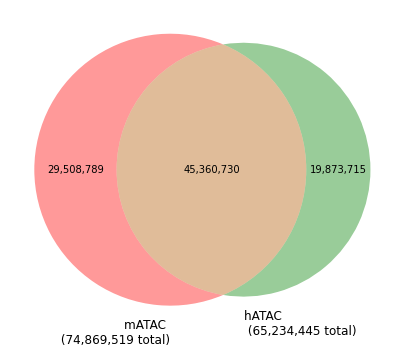

In [13]:
length_sum =  peak_df.groupby('label').length.sum()

# v = venn2(subsets=(length_sum.mATAC, length_sum.hATAC, length_sum.both),
#            set_labels = (f'mATAC \n ({length_sum.mATAC +length_sum.both} total)',
#                         f'hATAC \n ({length_sum.hATAC +length_sum.both} total)'))
plt.figure(figsize=(10,6))
v = venn2(subsets=(length_sum.mATAC, length_sum.hATAC, length_sum.both),
           set_labels = (f'mATAC \n (74,869,519 total)',
                        f'hATAC \n (65,234,445 total)'))
v.get_label_by_id('10').set_text('29,508,789')
v.get_label_by_id('01').set_text('19,873,715')
v.get_label_by_id('11').set_text('45,360,730')